<a href="https://colab.research.google.com/github/mariaulia/2025_Kecerdasan-Buatan/blob/main/Jobsheet8_KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 8: Supervise Learning Regression dan Classification


##Decision Tree (Pohon Keputusan)

In [ ]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

tree_model.predict(pd.DataFrame([[6.2, 3.4, 5.4, 2.3]], columns=X.columns))[0]

from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Accuracy:  0.933


##Linear Regression

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



1.0

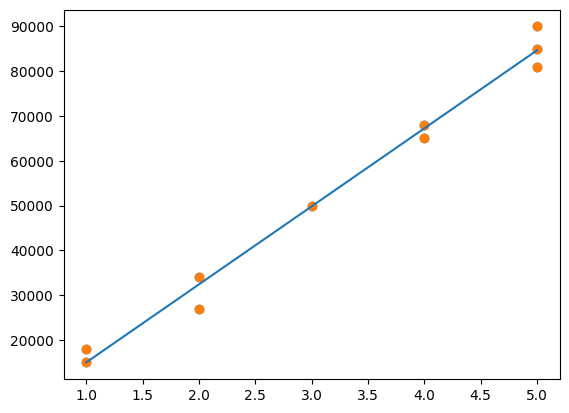

In [4]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

# uji akurasi model
linreg.score(X_test, y_pred)



##Logistic Regression

In [5]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
# uji akurasi model
model.score(X_test, y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


0.825

##Tugas Praktikkum

###Machine Learning: Klasifikasi & Regresi

####1. Memprediksi Calon Konsumen Melakukan Transaksi atau Tidak

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Baca file CSV dengan delimiter ";"
df = pd.read_csv('iklan_sosmed.csv', sep=';')

# Cek isi data
print(df.head())

# Drop kolom ID karena tidak dibutuhkan
df = df.drop(columns=['ID'])

# Ubah kolom kategorikal "Jenis_Kelamin" jadi numerik (one-hot encoding)
df = pd.get_dummies(df, columns=['Jenis_Kelamin'], drop_first=True)

# Pisahkan fitur (X) dan label (y)
X = df.drop(columns='Transaksi')
y = df['Transaksi']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data jadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========================
# Decision Tree Classifier
# ========================
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)

# ========================
# Logistic Regression
# ========================
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

# Tampilkan hasil akurasi
print(f"Akurasi Decision Tree       : {tree_acc:.3f}")
print(f"Akurasi Logistic Regression : {log_acc:.3f}")


         ID Jenis_Kelamin  Umur        Gaji  Transaksi
0  15624510          Pria    19   285000000          0
1  15810944          Pria    35   300000000          0
2  15668575        Wanita    26   645000000          0
3  15603246        Wanita    27   855000000          0
4  15804002          Pria    19  1140000000          0
Akurasi Decision Tree       : 0.825
Akurasi Logistic Regression : 0.887


####2. Memprediksi Gaji Pegawai Berdasarkan Masa Kerja

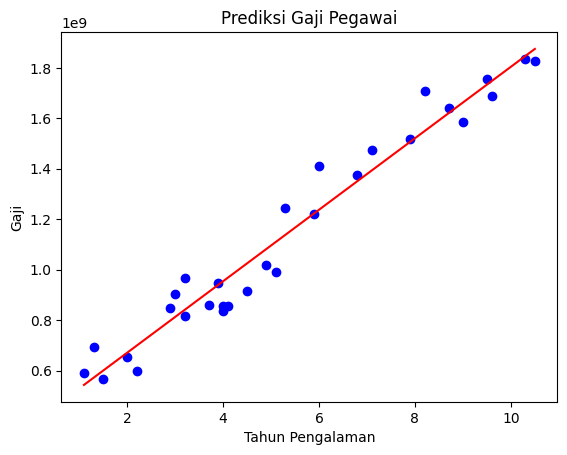

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset dengan delimiter ";"
df_gaji = pd.read_csv('Data_Gaji.csv', sep=';')

# Fitur dan label
X = df_gaji[['Tahun_Pengalaman']]
y = df_gaji['Gaji']

# Buat model dan latih
model = LinearRegression()
model.fit(X, y)

# Visualisasi
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Prediksi Gaji Pegawai')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji')
plt.show()


####4. Parameter Tuning untuk Meningkatkan Akurasi

##### Decision Tree

In [9]:
from sklearn.model_selection import GridSearchCV

params_tree = {
    'max_depth': [2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params_tree, cv=5)
grid_tree.fit(X_train, y_train)

print("Best Tree Accuracy:", grid_tree.best_score_)
print("Best Tree Params:", grid_tree.best_params_)


Best Tree Accuracy: 0.903125
Best Tree Params: {'criterion': 'entropy', 'max_depth': 4}


#####Logistic Regression

In [11]:
params_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(random_state=42), params_log, cv=5)
grid_log.fit(X_train, y_train)

print("Best Logistic Accuracy:", grid_log.best_score_)
print("Best Logistic Params:", grid_log.best_params_)


Best Logistic Accuracy: 0.815625
Best Logistic Params: {'C': 0.01, 'solver': 'liblinear'}
